### 這個工作的目標是在不斷變化的台股市場中尋找穩定獲利的進出場策略。策略名稱取自《易經》，以表徵市場的盤勢發展，並協助投資者趨吉避凶。



In [3]:
import datetime

from dateutil.relativedelta import relativedelta

from stock_tw.變易 import util, dataset

dataset.datatime_range

{'max_price': Timestamp('2023-06-29 00:00:00'),
 'max_pera': Timestamp('2023-12-31 00:00:00'),
 'max_revenue': Timestamp('2023-06-10 00:00:00'),
 'max_fin_stmt': Timestamp('2023-05-15 00:00:00'),
 'min_price': Timestamp('2023-06-27 00:00:00'),
 'min_pera': Timestamp('2023-12-31 00:00:00'),
 'min_revenue': Timestamp('2018-02-10 00:00:00'),
 'min_fin_stmt': Timestamp('2019-05-15 00:00:00')}

# 不易：利貞

In [5]:
df = dataset.analyze_profit()
df = dataset.append_stock_info(df)
df.head(10).round(2)

,name,group,殖利率(%),股利年度,股利連續N年,本益比,股價淨值比,EPS,GPM(%),NIM(%),...,DBR(%),EPS(0)+,GPM(%)+,NIM(%)+,ROA(%)+,ROE(%)+,DBR(%)+,股本+,資產+,權益+
code,,,,,,,,,,,,,,,,,,,,,
1101,台泥,水泥工業,1.31,111.0,5,50.07,1.27,0.76,33.02,12.86,...,47.99,-0.16,0.0,0.0,-0.35,-0.67,-0.30,0.0,839407.0,1805254.0
1102,亞泥,水泥工業,5.15,111.0,5,13.02,1.01,3.68,47.27,56.93,...,46.07,0.62,0.0,0.0,0.63,1.19,2.88,0.0,9599791.0,-4175360.0
1103,嘉泥,水泥工業,2.34,111.0,5,NaN,0.62,-0.13,28.31,-21.43,...,38.40,-0.02,0.0,0.0,-0.03,-0.05,-1.18,0.0,936998.0,1006731.0
1104,環泥,水泥工業,5.90,111.0,5,11.21,0.93,2.72,76.83,103.65,...,21.54,-0.50,0.0,0.0,-1.61,-2.10,-1.06,0.0,322963.0,549062.0
1108,幸福,水泥工業,4.66,111.0,4,10.59,1.47,1.62,95.16,58.79,...,51.43,-0.38,0.0,0.0,-1.55,-2.94,2.20,0.0,35436.0,-195578.0
1109,信大,水泥工業,4.32,111.0,5,13.91,0.80,1.33,80.20,36.63,...,14.89,0.08,0.0,0.0,0.09,0.08,-1.01,0.0,90859.0,193485.0
1110,東泥,水泥工業,0.52,111.0,5,70.93,1.25,0.27,22.60,10.28,...,27.76,-0.13,0.0,0.0,-0.61,-0.84,0.54,0.0,176452.0,62267.0
1201,味全,食品工業,1.19,111.0,5,37.31,1.41,0.53,108.49,5.15,...,61.31,0.43,0.0,0.0,1.17,2.95,2.38,0.0,1144919.0,23026.0
1203,味王,食品工業,2.36,111.0,5,19.70,1.97,2.37,106.59,48.58,...,33.57,-0.04,0.0,0.0,-0.23,-0.36,-0.69,0.0,117769.0,146770.0


# 不易：元亨

In [4]:
df = dataset.analyze_fin_stmt().iloc[:,0:40]
df.round(2)

,收盤價,漲跌幅(%),殖利率(%),股利年度,股利連續N年,本益比,股價淨值比,GPM(%),NIM(%),ROA(%),...,E(Avg),E(Std),E(0),E(1),E(2),E(3),外%(0),外%(1),外%(2),外%(3)
code,,,,,,,,,,,,,,,,,,,,,
1101,38.05,0.00,1.31,111.0,5,50.07,1.27,9.39,3.82,0.22,...,0.19,0.16,0.20,0.36,0.22,-0.02,130.74,56.51,90.06,-167.21
1102,44.65,0.11,5.15,111.0,5,13.02,1.01,10.31,14.41,0.83,...,0.92,0.55,0.81,0.19,1.33,1.35,62.32,-5.82,68.77,54.75
1103,21.40,-0.70,2.34,111.0,5,NaN,0.62,9.62,3.97,0.07,...,-0.03,0.43,0.03,0.05,0.41,-0.62,315.70,319.48,144.23,72.55
1104,30.50,-0.49,5.90,111.0,5,11.21,0.93,18.77,15.27,1.00,...,0.68,0.25,0.42,0.92,0.87,0.51,43.41,71.18,72.55,60.39
1108,17.15,-0.29,4.66,111.0,4,10.59,1.47,18.43,11.64,1.31,...,0.40,0.19,0.31,0.69,0.33,0.29,8.53,-2.09,10.23,-13.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8925,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8934,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9915,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 不易：躍龍在淵

In [6]:
# 月營收
m0_ts = util.time2monthly_date(datetime.datetime(2023, 6, 29))
revenues = dataset.revenues
m0_revenue = revenues.loc[m0_ts]
m1_revenue = revenues.loc[m0_ts - relativedelta(months=1)]
m2_revenue = revenues.loc[m0_ts - relativedelta(months=2)]
my_revenue = revenues.loc[m0_ts - relativedelta(years=1)]

M = m0_revenue[['當月營收']]
M = M.merge(right=m1_revenue[['當月營收']], on=['code'], how='left', suffixes=('', '_m1'))
M = M.merge(right=m2_revenue[['當月營收']], on=['code'], how='left', suffixes=('', '_m2'))
M = M.merge(right=my_revenue[['當月營收']], on=['code'], how='left', suffixes=('', '_my'))
M['YoY(%)'] = (M['當月營收'] - M['當月營收_my']) / M['當月營收_my'] * 100
M['MoM(%)'] = (M['當月營收'] - M['當月營收_m1']) / M['當月營收_m1'] * 100
M['IsM3'] = (M['當月營收'] > M['當月營收_m1']) & (M['當月營收_m1'] > M['當月營收_m2'])
M = dataset.append_stock_info(M)
M = M[M['MoM(%)'] != float('inf')]
M.sort_values('MoM(%)', ascending=False).iloc[:][ dataset.STOCK_COLs + dataset.REVENUE_REPORT_COLs].round(2)


,name,group,當月營收,YoY(%),MoM(%),IsM3
code,,,,,,
1805,寶徠,建材營造業,77846.0,2095.32,15254.24,False
1808,潤隆,建材營造業,2263754.0,4327.10,11171.99,False
2442,新美齊,電腦及週邊設備業,1145506.0,163.12,2617.43,True
2542,興富發,建材營造業,3535467.0,904.37,441.65,False
2524,京城,建材營造業,219383.0,-14.16,359.23,False
...,...,...,...,...,...,...
9949,琉園,文化創意業,17494.0,NaN,NaN,False
9950,萬國通,塑膠工業,296068.0,NaN,NaN,False
9951,皇田,電機機械,404628.0,NaN,NaN,False


# 不易：風升

In [7]:
dataset.base_profits.round(2)

基本每股盈餘合計  營業外收入及支出合計   營業毛利（毛損）  營業毛利（毛損）淨額   本期淨利（淨損）  \
ts         code                                                           
2019-05-15 1101      0.77    570533.0  6487864.0   6487864.0  4229970.0   
           1102      0.93    965675.0  4658501.0   4658501.0  3810086.0   
           1103      0.20    227459.0    65221.0     65221.0   148581.0   
           1104      0.24    147232.0   106420.0    106420.0   156601.0   
           1108     -0.07     -8688.0    26663.0     26663.0   -29773.0   
...                   ...         ...        ...         ...        ...   
2023-05-15 9951      1.35     17783.0   323449.0    323449.0   100993.0   
           9955     -0.31     -2636.0     -414.0      -414.0   -31769.0   
           9958      0.20    -77734.0   164956.0    164956.0    -7168.0   
           9960      0.59      4524.0    66043.0     66043.0    19940.0   
           9962      0.48      -424.0    78916.0     78916.0    43061.0   

                     營業收入合計  繼續營業單位稅前淨利（淨損）  繼續營業單位本期淨利（淨損）  母公司業主（淨利／損）  \
ts         code                                                            
2019-05-15 1101  25356328.0       5603495.0       4229970.0    3951920.0   
           1102  19385675.0       4743411.0       3810086.0    2929272.0   
           1103    452376.0        171491.0        147730.0     126476.0   
           1104   1187296.0        157355.0        156601.0     155181.0   
           1108    834345.0        -35049.0        -29773.0     -29773.0   
...                     ...             ...             ...          ...   
2023-05-15 9951   1225813.0        130166.0        100993.0     100993.0   
           9955    262585.0        -31769.0        -31769.0     -31769.0   
           9958   2675284.0         -4600.0         -7168.0      47789.0   
           9960    180868.0         26115.0         19940.0      19940.0   
           9962    912288.0         53876.0         43061.0      43061.0   

                 繼續營業單位淨利（淨損）  ...    (C)平均月營收  (C)合計月數  GPM(%)  NIM(%)  \
ts         code                ...                                        
2019-05-15 1101          0.77  ...  8452110.33        3   25.59   16.68   
           1102           NaN  ...  6463535.00        3   24.03   19.65   
           1103          0.20  ...   150797.00        3   14.42   32.84   
           1104           NaN  ...   395765.33        3    8.96   13.19   
           1108         -0.07  ...   278115.67        3    3.20   -3.57   
...                       ...  ...         ...      ...     ...     ...   
2023-05-15 9951          1.34  ...   368737.00        1   26.39    8.24   
           9955         -0.31  ...    87495.33        3   -0.16  -12.10   
           9958           NaN  ...   891764.67        3    6.17   -0.27   
           9960           NaN  ...    59256.00        1   36.51   11.02   
           9962           NaN  ...   281173.00        1    8.65    4.72   

                      普通股股本         資產總計        權益總額  ROA(%)  ROE(%)  DBR(%)  
ts         code                                                               
2019-05-15 1101  51080599.0  365525031.0         NaN    1.16     NaN     NaN  
           1102  33614472.0  286909551.0         NaN    1.33     NaN     NaN  
           1103   7747805.0   34436093.0         NaN    0.43     NaN     NaN  
           1104   6536092.0   23115808.0         NaN    0.68     NaN     NaN  
           1108   4047380.0    7507236.0         NaN   -0.40     NaN     NaN  
...                     ...          ...         ...     ...     ...     ...  
2023-05-15 9951    749000.0    5483331.0   3265776.0    1.84    3.09   40.44  
           9955   1032082.0    2970500.0   1365281.0   -1.07   -2.33   54.04  
           9958   2323964.0   33597183.0  10192935.0   -0.02   -0.07   69.66  
           9960    335925.0    1331262.0    626037.0    1.50    3.19   52.97  
           9962    902203.0    1429313.0   1085001.0    3.01    3.97   24.09  

[18493 rows x 22 columns]

<Axes: xlabel='ts'>

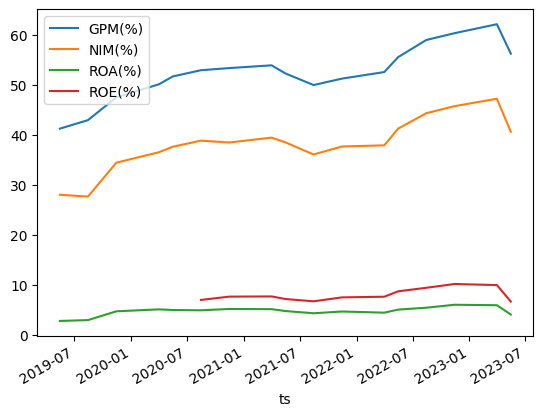

In [9]:
# 台積電獲利能力

df = dataset.base_profits.round(2)
df = dataset.reverse_df_index(df)
df = df.loc['2330'][['GPM(%)', 'NIM(%)', 'ROA(%)' ,'ROE(%)']]
df.plot()

<Axes: >

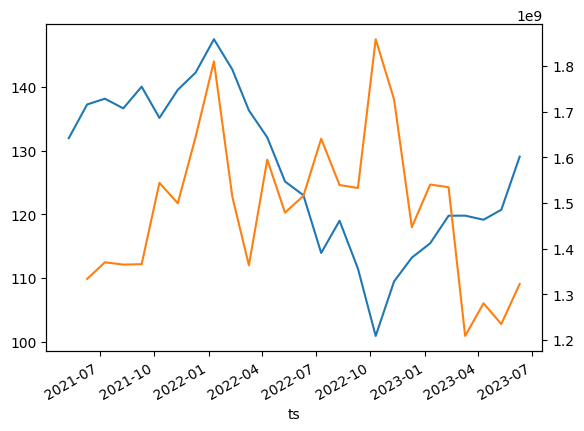

In [13]:
# TW50 股價-營收 趨勢觀察

# connection = util.get_db_proxy().connection
# dataset.refresh_revenues(connection, datetime.datetime(2021, 5, 1))
# dataset.refresh_prices(connection, datetime.datetime(2021, 5, 1))
# connection.close()

TW50 = [ '台積電', '鴻海', '聯發科', '台達電', '聯電', '中華電', '中信金', '兆豐金', '玉山金', '南亞', '日月光投控', '中鋼', '台塑', '廣達', 
        '中租-KY', '第一金', '合庫金', '聯詠', '和泰車', '台泥', '台化', '大立光', '華南金', '亞德客-KY', '華新', '台塑化', '彰銀', 
        '矽力*-KY', '陽明', '萬海', '豐泰', '南亞科'] + ["元大金", "台灣大", "國泰金", "富邦金", "統一", "統一超", "遠傳", "遠東新", "開發金"]

_revenues = dataset.revenues.reset_index()
_revenues = _revenues[ (_revenues['ts'] > datetime.datetime(2021, 5, 10)) & (_revenues['ts'] < datetime.datetime(2023, 7, 1)) ]
_revenues = dataset.append_stock_info(_revenues).set_index(['name'])
_revenues = _revenues.loc[TW50][['當月營收', 'ts']]
# _revenues.groupby(['ts']).count()
_revenues = _revenues.groupby(['ts']).sum()
_revenues

_prices = dataset.prices.reset_index()
_prices = _prices[ (_prices['ts'] > datetime.datetime(2021, 5, 10)) & (_prices['ts'] < datetime.datetime(2023, 7, 1)) ]
_prices = dataset.append_stock_info(_prices).set_index(['name'])
_prices = _prices.loc['元大台灣50'][['收盤價', 'ts']]
_prices['ts'] = _prices['ts'].apply(lambda x: datetime.datetime(x.year, x.month, 10))
_prices = _prices.groupby(['ts']).mean()

_prices['收盤價'].plot()
_revenues['當月營收'].plot(secondary_y=True)

# 不易：飛龍在天

In [14]:
fin_stmt = dataset.anal_fin_stmt

fin_stmt["YoY(%)"] = (
    (fin_stmt["本期淨利（淨損）"] - fin_stmt["本期淨利（淨損）_q4"]) / fin_stmt["本期淨利（淨損）_q4"] * 100
)
fin_stmt["MoM(%)"] = (
    (fin_stmt["本期淨利（淨損）"] - fin_stmt["本期淨利（淨損）_q1"]) / fin_stmt["本期淨利（淨損）_q1"] * 100
)
fin_stmt["IsQ3"] = (fin_stmt["本期淨利（淨損）"] > fin_stmt["本期淨利（淨損）_q1"]) & (
    fin_stmt["本期淨利（淨損）_q1"] > fin_stmt["本期淨利（淨損）_q2"]
)
fin_stmt = fin_stmt.sort_values(['MoM(%)', 'YoY(%)'], ascending=False)

fin_stmt[['本期淨利（淨損）', 'YoY(%)', 'MoM(%)',	'IsQ3', ]].head(10).round(2)

,本期淨利（淨損）,YoY(%),MoM(%),IsQ3
code,,,,
1538,-12682.0,-58.44,17037.84,False
2440,-22359.0,12532.20,11192.42,False
2369,-103258.0,-172.49,4796.06,False
2615,-2112792.0,-105.20,4762.02,False
6153,-860911.0,493.63,2939.30,False
5533,369783.0,-39.44,2827.58,False
9906,45937.0,-69.41,2781.87,False
2458,242624.0,-68.62,2044.65,False
6225,-870.0,132.62,2021.95,False


# 不易：亢龍有悔